1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

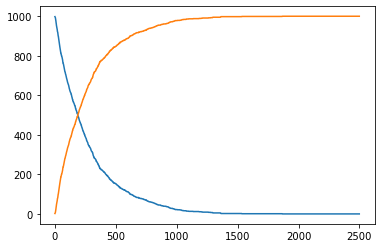

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seconds = 2500

def decay(tau, prob_f, tl_atoms=1000):
    tl_atoms_hist_list = []
    
    for second in range(seconds):
        prob = prob_f(second, tau*60)
        decayed_atoms = sum(np.random.uniform(0, 1, tl_atoms) < prob)
        tl_atoms -= decayed_atoms
        tl_atoms_hist_list.append(tl_atoms)
    
    return np.array(tl_atoms_hist_list)
                  
tl_atoms_hist = decay(tau=3.052, prob_f=lambda t, tau: 1 - 2**(-1/tau))

plt.plot(tl_atoms_hist)
plt.plot(1000 - tl_atoms_hist)

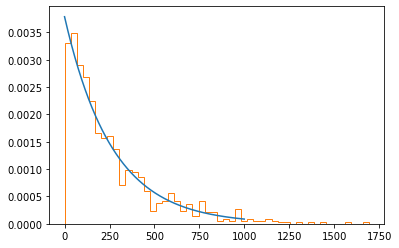

In [4]:
tau = 3.052 * 60
n_atoms = 1000

def pdf(t):
    return (2 **(-t/tau)) * np.log(2) / tau
    
def icdf(t):
    return (-tau * np.log(1-t)/np.log(2))

u = np.random.random(1000)
v = icdf(u)

a=list(map(pdf, range(len(v))))

plt.plot(range(1000), a)
h, bins, _ = plt.hist(v, histtype = 'step', bins=50, density=True)

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

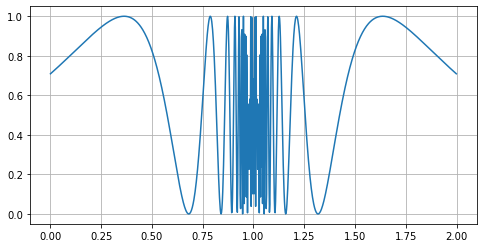

In [7]:
def f(x):
    return np.sin(1. / (1 - x))**2

x = np.linspace(0.001, 1.999, 1000)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f(x))
ax.grid()
plt.show()

In [8]:
def print_statistics(f, N):
    integrals = []
    for i in range (1000):
        integrals.append(f(N))
    integrals = np.array(integrals) 
    print("mean with %d points :%.4f" % (N, integrals.mean()))
    print("standard deviation with %d points :%.4f" % (N, integrals.std()/integrals.mean() ))
    
def integral_hit_miss(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is between 0 and 2
        y = np.random.random() # y is between 0 and 1
        if y < f(x):
            count +=1
    return 2 * count / N

N=1000
print_statistics(integral_hit_miss, N)

mean with 1000 points :1.3469
standard deviation with 1000 points :0.0213


In [9]:
def integral_mean(f):
    N = 100000
    x = 2*np.random.random(N)
    return (2 - 0)/N * np.sum(f(x))

def error_estimation_mean_value():
    integral_list = []
    for i in range(100):
        integral_list.append(integral_mean(f))
    return np.array(integral_list)

integral_list = error_estimation_mean_value()

print('Integral mean value:', integral_list.mean())
print('Integral std value: ', integral_list.std())

Integral mean value: 1.3470256048049967
Integral std value:  0.0018369621170770435


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
def f(x):
    if np.sqrt(sum(x**2)) > 1:
        return 0
    else:
        return 1

def integral_high_dim(f, a=-1, b=+1, dim=2):
    N = 100000
    x = (b - a) * np.random.random((dim, N)) + a
    return ((b - a) ** dim) / N * np.sum(np.apply_along_axis(f, axis=0, arr=x))

def error_estimation_high_dim():
    result_list = []
    for i in range(100):
        result_list.append(integral_high_dim(f, dim=10))
    result_list = np.array(result_list)
    
    return result_list.mean(), result_list.std()
    
I = integral_high_dim(f, dim=2)
print('Area of circle:', I, '\n')

I = integral_high_dim(f, dim=10)
print('Volume of sphere 10 dimensions:', I)

mean, std = error_estimation_high_dim()
print('Volume of sphere 10 dimensions (mean):', mean)
print('Volume of sphere 10 dimensions (std):', std)

Area of circle: 3.1362400000000004 

Volume of sphere 10 dimensions: 2.4576000000000002
Volume of sphere 10 dimensions (mean): 2.5112576000000004
Volume of sphere 10 dimensions (std): 0.1549533636493252


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [11]:
def f(x):
    return x**(-1/2) / (np.e**x + 1)

def w(x):
    return 1 / np.sqrt(x)

n = 10000
x = np.random.random(n) ** 2

def importance_sampling():
    result_list = []
    for i in range(100):
        result = 2 / n * np.sum(f(x) / w(x))
        result_list.append(result)
    result_list = np.array(result_list)
    
    return result_list.mean(), result_list.std()

mean, std = importance_sampling()
print('Intregral (mean):', mean, ' std:', std)


Intregral (mean): 0.8391350459867886  std: 2.220446049250313e-16
